In [1]:
## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

In [2]:
review_df = pd.read_json('Electronics_5.json', orient='records', lines=True)

In [3]:
str(review_df)

'             reviewerID        asin                     reviewerName  \\\n0         AO94DHGC771SJ  0528881469                          amazdnu   \n1         AMO214LNFCEI4  0528881469                  Amazon Customer   \n2        A3N7T0DY83Y4IG  0528881469                    C. A. Freeman   \n3        A1H8PY3QHMQQA0  0528881469         Dave M. Shaw "mack dave"   \n4        A24EV6RXELQZ63  0528881469                      Wayne Smith   \n...                 ...         ...                              ...   \n1689183  A34BZM6S9L7QI4  B00LGQ6HL8      Candy Cane "Is it just me?"   \n1689184  A1G650TTTHEAL5  B00LGQ6HL8  Charles Spanky "Zumina Reviews"   \n1689185  A25C2M3QF9G7OQ  B00LGQ6HL8                           Comdet   \n1689186   A1E1LEVQ9VQNK  B00LGQ6HL8                      J. Chambers   \n1689187  A2NYK9KWFMJV4Y  B00LGQ6HL8      Mike Tarrani "Jazz Drummer"   \n\n          helpful                                         reviewText  overall  \\\n0          [0, 0]  We got this GPS fo

In [4]:
review_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
##########################################
## CHECK DATA IN PANDAS
##########################################

# change column name 
review_df = review_df.rename(columns={'overall': 'Rating'})

print ("Total data:", str(review_df.shape))
review_df.head()

Total data: (1689188, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [6]:
##########################################
## IMPORT ELECTRONICS PRODUCT METADATA IN PANDAS
##########################################

import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

dfmeta = getDF('meta_Electronics.json.gz')

In [7]:
print ("Total data:", str(dfmeta.shape))
dfmeta.head()

Total data: (498196, 9)


,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [8]:
##########################################
## MERGING PRODUCT REVIEW AND METADATA IN PANDAS
##########################################

product_reviews=pd.merge(review_df,dfmeta,on='asin',how='left')

In [9]:
product_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [10]:
product_reviews.shape

(1689188, 17)

In [11]:
product_reviews.describe()

,Rating,unixReviewTime,price
count,1.689188e+06,1.689188e+06,1.639882e+06
mean,4.222779e+00,1.340571e+09,7.440153e+01
std,1.185632e+00,6.342451e+07,1.237526e+02
min,1.000000e+00,9.292320e+08,1.000000e-02
25%,4.000000e+00,1.318118e+09,1.074000e+01
50%,5.000000e+00,1.360800e+09,2.778000e+01
75%,5.000000e+00,1.385078e+09,7.907000e+01
max,5.000000e+00,1.406074e+09,9.999900e+02


In [12]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   Rating          1689188 non-null  int64  
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

In [13]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews.isnull().sum()

reviewerID             0
asin                   0
reviewerName       24730
helpful                0
reviewText             0
Rating                 0
summary                0
unixReviewTime         0
reviewTime             0
imUrl               1213
description        33677
categories             0
title              45502
price              49306
salesRank         879118
related            27046
brand             734937
dtype: int64

In [14]:
##########################################
## FILLING NULL VALUES IN BRAND NAME WITH FIRST WORD FROM TITLE
##########################################

product_reviews.loc[product_reviews.brand.isnull(),'brand'] = product_reviews.title.str.split().str.get(0)

In [15]:
product_reviews.isnull().sum()

reviewerID             0
asin                   0
reviewerName       24730
helpful                0
reviewText             0
Rating                 0
summary                0
unixReviewTime         0
reviewTime             0
imUrl               1213
description        33677
categories             0
title              45502
price              49306
salesRank         879118
related            27046
brand              45502
dtype: int64

In [16]:
product_reviews=product_reviews.dropna(subset=['title','reviewerName','description','price','related','salesRank'])

In [17]:
product_reviews.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
Rating            0
summary           0
unixReviewTime    0
reviewTime        0
imUrl             0
description       0
categories        0
title             0
price             0
salesRank         0
related           0
brand             0
dtype: int64

In [18]:
product_reviews.shape

(755564, 17)

## Extracting Speakers from Title column

In [19]:
##########################################
## EXTRACTING Speakers FROM TITLE COLUMN
##########################################

product_reviews_sp = product_reviews[product_reviews["title"].str.contains("Speaker|Speakers|speaker|speaker")]

In [20]:
product_reviews_sp.shape

(26341, 17)

In [21]:
product_reviews_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26341 entries, 1420 to 1689182
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      26341 non-null  object 
 1   asin            26341 non-null  object 
 2   reviewerName    26341 non-null  object 
 3   helpful         26341 non-null  object 
 4   reviewText      26341 non-null  object 
 5   Rating          26341 non-null  int64  
 6   summary         26341 non-null  object 
 7   unixReviewTime  26341 non-null  int64  
 8   reviewTime      26341 non-null  object 
 9   imUrl           26341 non-null  object 
 10  description     26341 non-null  object 
 11  categories      26341 non-null  object 
 12  title           26341 non-null  object 
 13  price           26341 non-null  float64
 14  salesRank       26341 non-null  object 
 15  related         26341 non-null  object 
 16  brand           26341 non-null  object 
dtypes: float64(1), int64(2), o

In [22]:
##########################################
## CONCATENATE REVIEWTEXT AND SUMMARY 
##########################################

product_reviews_sp['review_text'] = product_reviews_sp[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_sp2 = product_reviews_sp.drop(['reviewText', 'summary'], axis = 1)
product_reviews_sp2.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,review_text
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,"[0, 0]",3,1173744000,"03 13, 2007",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me? I'm shopping around for wireles...
1421,A7OR8OWWGK55W,B00000J0D8,BJB,"[6, 8]",2,1128902400,"10 10, 2005",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Works OK. 2.5 stars Works ok. Not worth the p...
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,"[4, 4]",2,1164153600,"11 22, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,"One broke, other complete fuzz I purchased the..."
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,"[20, 21]",3,1043884800,"01 30, 2003",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Pretty Good Speakers I got these for Christmas...
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""","[7, 7]",4,1140480000,"02 21, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Good enough that I want to buy a THIRD pair! I...


In [23]:
product_reviews_sp2[product_reviews_sp2.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,review_text
503359,A1YDIJTJS2KAHG,B001OAB6BW,Brandon,"[0, 0]",5,1388102400,"12 27, 2013",http://ecx.images-amazon.com/images/I/21cSnTf1...,"Speaker Adapter for Select Ford Vehicles, Conn...","[[Electronics, Car & Vehicle Electronics, Car ...",Metra 72-5600 Speaker Adapter for Select Ford ...,5.84,{'Electronics': 935},"{'also_bought': ['B00A0LYAU0', 'B002CMUKZY', '...",Metra,Perfect 2013 Ford F-150 XLT SuperCrewBasically...
503360,A1UX8UU1ULGEE5,B001OAB6BW,Brandon,"[0, 0]",5,1388102400,"12 27, 2013",http://ecx.images-amazon.com/images/I/21cSnTf1...,"Speaker Adapter for Select Ford Vehicles, Conn...","[[Electronics, Car & Vehicle Electronics, Car ...",Metra 72-5600 Speaker Adapter for Select Ford ...,5.84,{'Electronics': 935},"{'also_bought': ['B00A0LYAU0', 'B002CMUKZY', '...",Metra,2006 Mazda3 Hatchback I don't have the Bose sy...


In [24]:
product_reviews_sp2.shape

(26341, 16)

In [25]:
##########################################
# Drop 'reviewName' and 'unixReviewTime'columns
##########################################

product_reviews_sp2 = product_reviews_sp2.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [26]:
product_reviews_sp2.shape

(26340, 16)

In [27]:
product_reviews_sp2.describe()

,Rating,unixReviewTime,price
count,26340.000000,2.634000e+04,26340.000000
mean,4.328512,1.349572e+09,93.816835
std,1.057811,5.179686e+07,113.079711
min,1.000000,9.961056e+08,2.570000
25%,4.000000,1.326413e+09,19.990000
50%,5.000000,1.364386e+09,49.180000
75%,5.000000,1.387238e+09,129.990000
max,5.000000,1.406074e+09,999.000000


In [28]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(product_reviews_sp2[product_reviews_sp2['Rating'] >= 3])
bad_rate = len(product_reviews_sp2[product_reviews_sp2['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Speakers products'.format(good_rate))
print ('Bad ratings : {} reviews for Speakers products'.format(bad_rate))


Good ratings : 24181 reviews for Speakers products
Bad ratings : 2159 reviews for Speakers products


In [29]:
##########################################
# Apply the new classification to the ratings column
##########################################
product_reviews_sp2['rating_class'] = product_reviews_sp2['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews_sp2.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,review_text,rating_class
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,"[0, 0]",3,1173744000,"03 13, 2007",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me? I'm shopping around for wireles...,good
1421,A7OR8OWWGK55W,B00000J0D8,BJB,"[6, 8]",2,1128902400,"10 10, 2005",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Works OK. 2.5 stars Works ok. Not worth the p...,bad
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,"[4, 4]",2,1164153600,"11 22, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,"One broke, other complete fuzz I purchased the...",bad
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,"[20, 21]",3,1043884800,"01 30, 2003",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Pretty Good Speakers I got these for Christmas...,good
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""","[7, 7]",4,1140480000,"02 21, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Good enough that I want to buy a THIRD pair! I...,good


In [30]:
# Rename the columns
product_reviews_sp2.columns = ['reviewer_id','product_id','reviewer_name','helpful','rating','unix_review_time','reviewTime','url','description','categories','product_title','price','salesRank','related','brand_name','review_text', 'rating_class']

# Sample observation
product_reviews_sp2.head()

,reviewer_id,product_id,reviewer_name,helpful,rating,unix_review_time,reviewTime,url,description,categories,product_title,price,salesRank,related,brand_name,review_text,rating_class
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,"[0, 0]",3,1173744000,"03 13, 2007",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me? I'm shopping around for wireles...,good
1421,A7OR8OWWGK55W,B00000J0D8,BJB,"[6, 8]",2,1128902400,"10 10, 2005",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Works OK. 2.5 stars Works ok. Not worth the p...,bad
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,"[4, 4]",2,1164153600,"11 22, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,"One broke, other complete fuzz I purchased the...",bad
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,"[20, 21]",3,1043884800,"01 30, 2003",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Pretty Good Speakers I got these for Christmas...,good
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""","[7, 7]",4,1140480000,"02 21, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Good enough that I want to buy a THIRD pair! I...,good


In [31]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_reviews_sp2)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_sp2.reviewer_id.unique()))
reviewer_prop = float(len(product_reviews_sp2.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_sp2.product_id.unique()))
product_prop = float(len(product_reviews_sp2.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_sp2.rating.mean(),3))

Number of reviews:  26340

Number of unique reviewers:  21517
Prop of unique reviewers:  0.817

Number of unique products:  816
Prop of unique products:  0.031

Average rating score:  4.329


In [32]:
product_reviews_sp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26340 entries, 1420 to 1689182
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewer_id       26340 non-null  object 
 1   product_id        26340 non-null  object 
 2   reviewer_name     26340 non-null  object 
 3   helpful           26340 non-null  object 
 4   rating            26340 non-null  int64  
 5   unix_review_time  26340 non-null  int64  
 6   reviewTime        26340 non-null  object 
 7   url               26340 non-null  object 
 8   description       26340 non-null  object 
 9   categories        26340 non-null  object 
 10  product_title     26340 non-null  object 
 11  price             26340 non-null  float64
 12  salesRank         26340 non-null  object 
 13  related           26340 non-null  object 
 14  brand_name        26340 non-null  object 
 15  review_text       26340 non-null  object 
 16  rating_class      26340 non-null  o

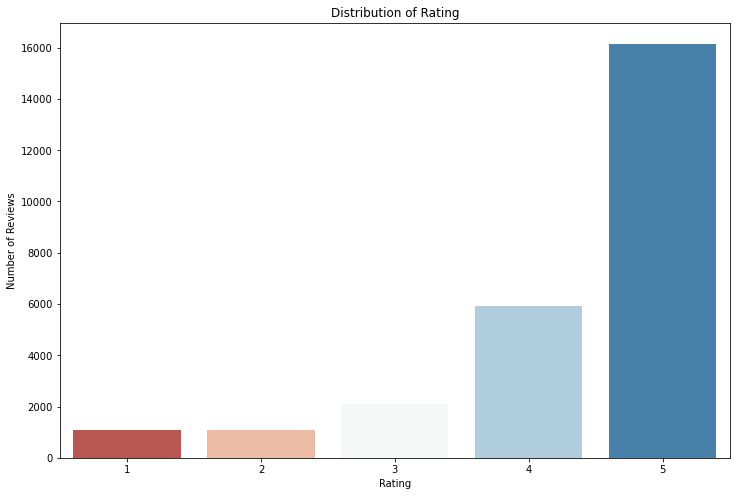

In [33]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=product_reviews_sp2, palette='RdBu')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [34]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 
# count the values on 'Scores'.

class_counts = product_reviews_sp2['rating'].value_counts()

class_counts

5    16159
4     5917
3     2105
1     1083
2     1076
Name: rating, dtype: int64

In [35]:
##########################################
## Split 'helpful' column into 'HelpfulnessDenominator' and 'HelpfulnessNumerator' and drop it at the end
##########################################


HelpfulnessNumerator = []
HelpfulnessDenominator = []

for help in product_reviews_sp2['helpful']:
    HelpfulnessNumerator.append(help[0])
    HelpfulnessDenominator.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
product_reviews_sp2['HelpfulnessNumerator'] = HelpfulnessNumerator

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
product_reviews_sp2['HelpfulnessDenominator'] = HelpfulnessDenominator

# Drop redundant 'helpful' column
product_reviews_sp2 = product_reviews_sp2.drop('helpful', axis = 1)
product_reviews_sp2.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,price,salesRank,related,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,"03 13, 2007",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me? I'm shopping around for wireles...,good,0,0
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,"10 10, 2005",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Works OK. 2.5 stars Works ok. Not worth the p...,bad,6,2
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,"11 22, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,"One broke, other complete fuzz I purchased the...",bad,4,0
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,3,1043884800,"01 30, 2003",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Pretty Good Speakers I got these for Christmas...,good,20,1
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""",4,1140480000,"02 21, 2006",http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Good enough that I want to buy a THIRD pair! I...,good,7,0


In [36]:
# take the Helpfulness column for visualization
Helpfulness_df = product_reviews_sp2[["HelpfulnessNumerator","HelpfulnessDenominator"]]

In [37]:
# recoding the Helpfulness column
Helpfulness_df["helpfulness"]  = (Helpfulness_df["HelpfulnessNumerator"]/Helpfulness_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

In [38]:
#check the dataset
Helpfulness_df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,helpfulness
1420,0,0,useless
1421,6,2,>75%
1422,4,0,>75%
1423,20,1,>75%
1424,7,0,>75%


In [39]:
#Checking the value count for 'Usefulness'
Helpfulness_df["helpfulness"].value_counts()

useless    14188
>75%       10037
<25%        1626
25-75%       489
Name: helpfulness, dtype: int64

In [40]:
#copying the original dataframe to 'temp_df'.
temp_df = product_reviews_sp2[['reviewer_id','HelpfulnessNumerator','HelpfulnessDenominator', 'review_text', 'rating']].copy()

#Adding new features to dataframe.
temp_df["Sentiment"] = temp_df["rating"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))
temp_df["Usefulness"] = (temp_df["HelpfulnessNumerator"]/temp_df["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

#temp_df.loc[temp_df.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]

#observe the shape of our new dataframe.
temp_df.shape

(26340, 7)

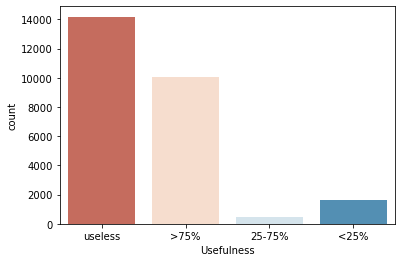

In [41]:
#plot for Helpfulness on the new dataframe
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Usefulness')
plt.show()

In [42]:
#count the unique column of Helpfulness with score 5
temp_df[temp_df.rating==5].Usefulness.value_counts()

useless    9200
>75%       6174
<25%        642
25-75%      143
Name: Usefulness, dtype: int64

In [43]:
#count the unique column of Helpfulness with score 2
temp_df[temp_df.rating==2].Usefulness.value_counts()

useless    438
>75%       399
<25%       173
25-75%      66
Name: Usefulness, dtype: int64

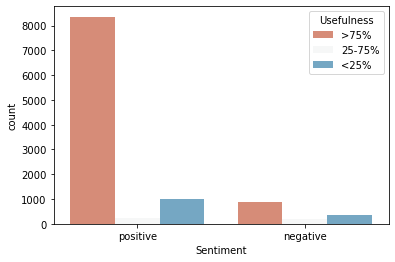

In [44]:
#Group bar chart for Helpfulness 
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [45]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_sp2['reviewer_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_sp2['product_id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_sp2)/len(product_reviews_sp2['reviewer_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_sp2)/len(product_reviews_sp2['product_id'].unique()))))


Number of unique customers : 21517

Number of unique products : 816

Review per customer: 1.2241483478180044

Review per product: 32.279411764705884


## Data Preprocessing and Exploratory Data Analysis

Text(0, 0.5, 'Number of Reviews')

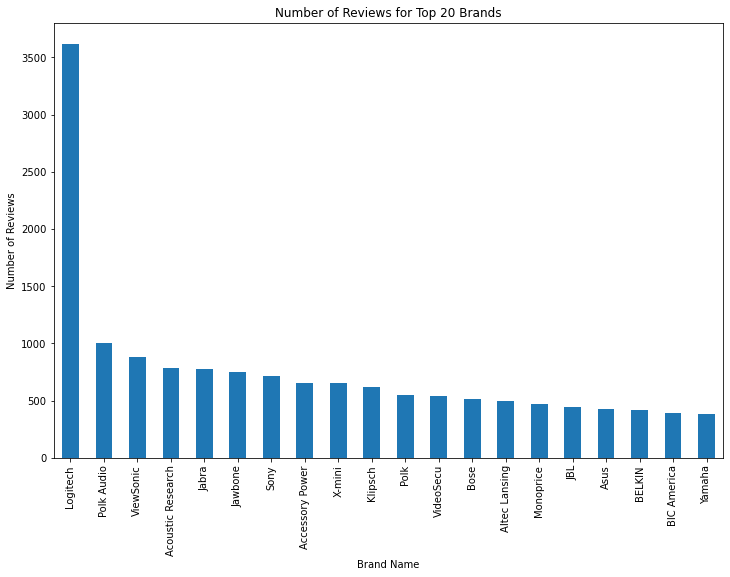

In [46]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = product_reviews_sp2["brand_name"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')


Text(0, 0.5, 'Number of Reviews')

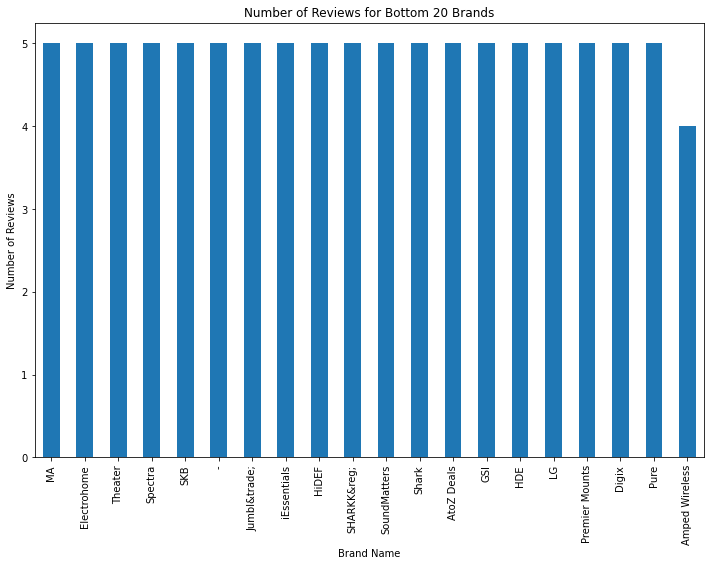

In [47]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = product_reviews_sp2["brand_name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

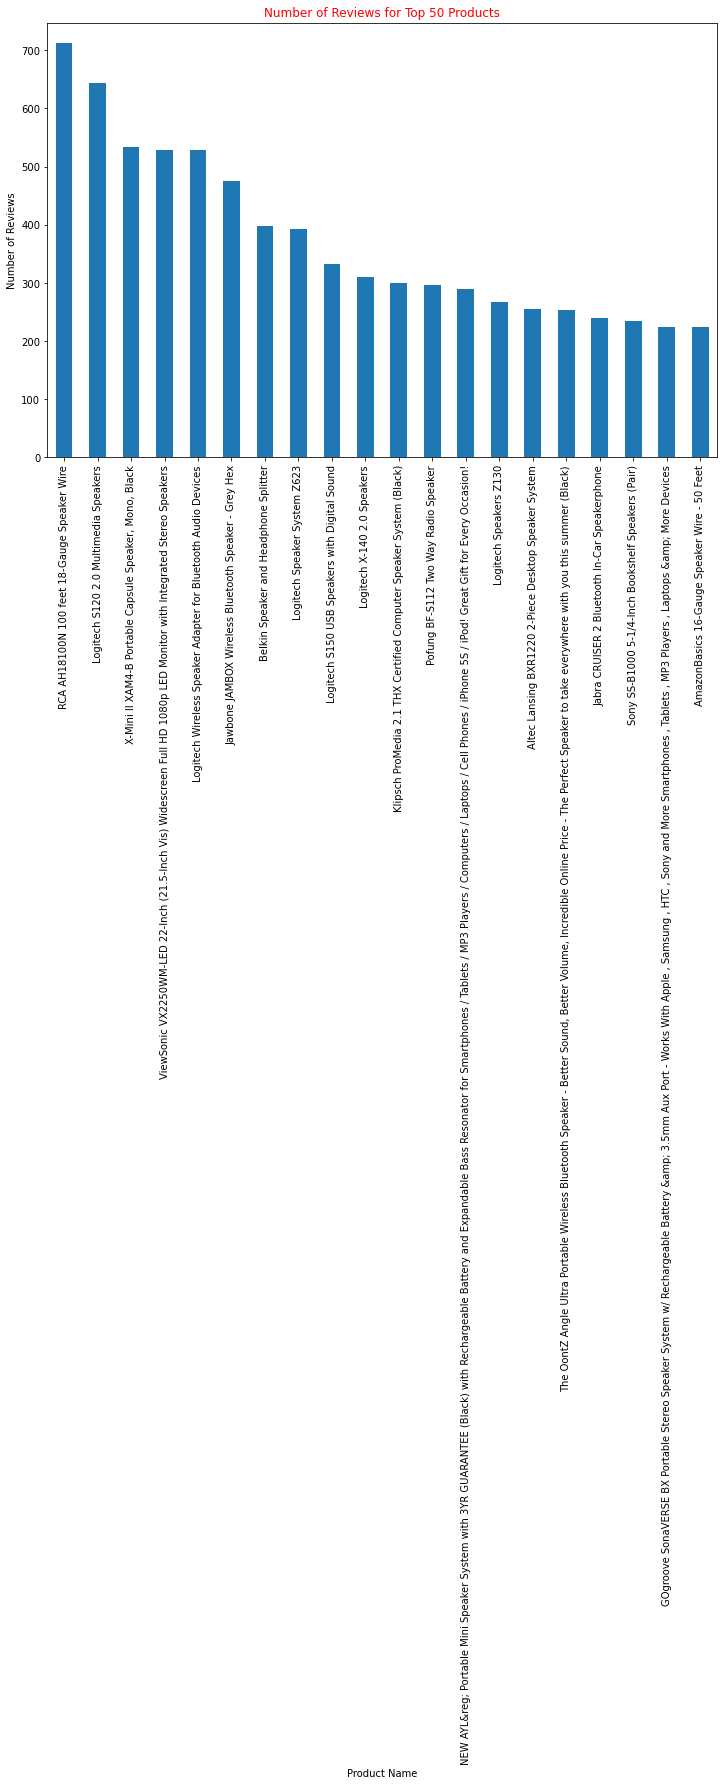

In [48]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = product_reviews_sp2["product_title"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products",color = 'r')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

<AxesSubplot:ylabel='rating'>

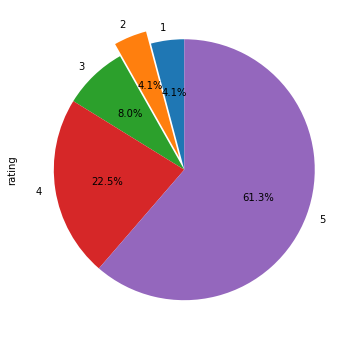

In [49]:
%matplotlib inline
plt.figure(figsize = (10,6))

product_reviews_sp2.groupby('rating').rating.count()
product_reviews_sp2.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [50]:
product_reviews_sp2['reviewTime'] = pd.to_datetime(product_reviews_sp2['reviewTime'])
product_reviews_sp2['year'] = product_reviews_sp2['reviewTime'].dt.year
#df = df.drop('review_time', axis = 1)
product_reviews_sp2.head(3)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,price,salesRank,related,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me? I'm shopping around for wireles...,good,0,0,2007
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Works OK. 2.5 stars Works ok. Not worth the p...,bad,6,2,2005
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,"One broke, other complete fuzz I purchased the...",bad,4,0,2006


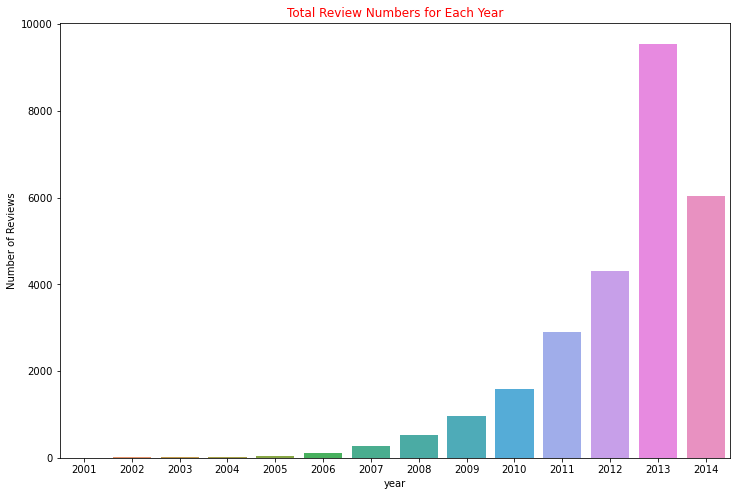

2013    9551
2014    6040
2012    4298
2011    2903
2010    1577
2009     961
2008     521
2007     269
2006     118
2005      48
2004      28
2003      18
2002       7
2001       1
Name: year, dtype: int64

In [51]:
##################################################################
# Total review for every year in the speaker product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(product_reviews_sp2['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
product_reviews_sp2['year'].value_counts()

In [52]:
# unique customers for each "rating class"
a = list(product_reviews_sp2.groupby(['rating_class'])['reviewer_id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(product_reviews_sp2['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 2081               2159
1         good                19878              24181


Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

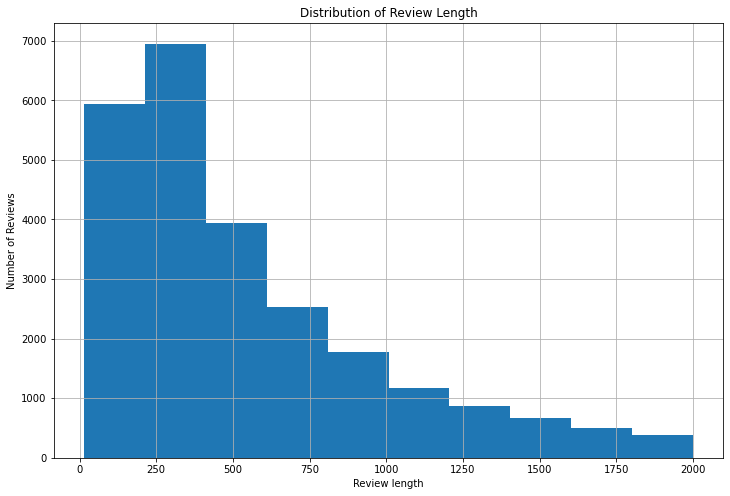

In [53]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = product_reviews_sp2["review_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

<AxesSubplot:>

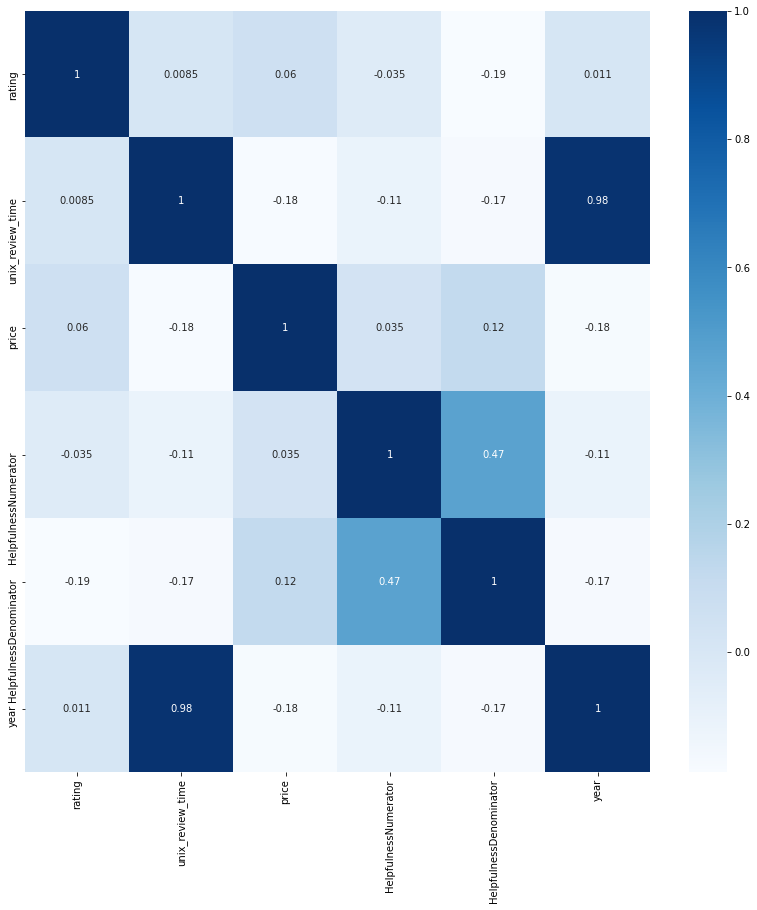

In [54]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(product_reviews_sp2.corr(method="pearson"), cmap='Blues', annot = True)

Like positive correlation, there is a slightly negative correlation between rating and HelpfulnessNumerator and HelpfulnessDenominator feedback. This relationship has no importance.

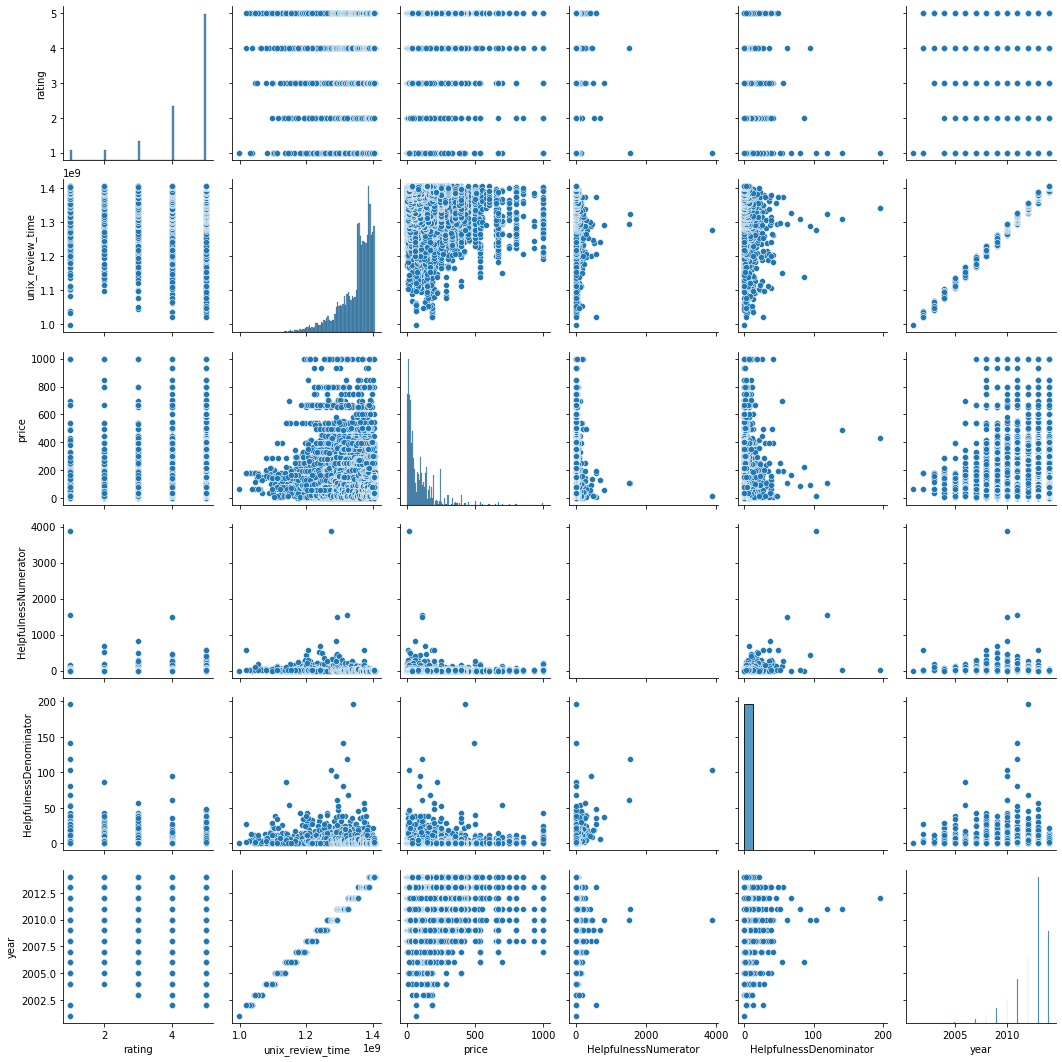

In [55]:
sns.pairplot(product_reviews_sp2)

In [56]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import requests
from spacy import displacy
from collections import Counter
from pprint import pprint
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
#pip install spacy

In [58]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [59]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(denoise_text)

In [60]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(remove_special_characters)

In [61]:
## Removal of urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(lambda text: remove_urls(text))

In [62]:
#Removing accent 
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#Apply function on review column
product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(remove_accented_chars)

In [63]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(simple_stemmer)

In [64]:
# Expand most common contractions 
def expand_contractions(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#Apply function on review column
product_reviews_sp2['review_text']=product_reviews_sp2['review_text'].apply(expand_contractions)

In [65]:
product_reviews_sp2['review_text']


1420       Is it just me Im shop around for wireless spea...
1421       work OK 25 star work ok not worth the price ta...
1422       one broke other complet fuzz I purchas these s...
1423       pretti good speaker I got these for christma o...
1424       good enough that I want to buy a third pair I ...
                                 ...                        
1689178    simpli stellar super sonic speaker system can ...
1689179    excel bluetooth speaker with lot of bell and w...
1689180    best sound speaker at thi price rang My short ...
1689181    impress sound stylish excel price the creativ ...
1689182    whi thi will Be amazon top sell portabl blueto...
Name: review_text, Length: 26340, dtype: object

In [66]:
product_reviews_sp2['clean_text'] = product_reviews_sp2['review_text']

In [67]:
product_reviews_sp2.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,price,salesRank,related,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year,clean_text
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me Im shop around for wireless spea...,good,0,0,2007,Is it just me Im shop around for wireless spea...
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,work OK 25 star work ok not worth the price ta...,bad,6,2,2005,work OK 25 star work ok not worth the price ta...
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,one broke other complet fuzz I purchas these s...,bad,4,0,2006,one broke other complet fuzz I purchas these s...
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,3,1043884800,2003-01-30,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,pretti good speaker I got these for christma o...,good,20,1,2003,pretti good speaker I got these for christma o...
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""",4,1140480000,2006-02-21,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,69.99,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,good enough that I want to buy a third pair I ...,good,7,0,2006,good enough that I want to buy a third pair I ...


In [68]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in product_reviews_sp2['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])

['work', 'OK', '25', 'star', 'work', 'ok', 'not', 'worth', 'the', 'price', 'tag', 'new', 'I', 'purchas', 'refurb', 'for', 'half', 'the', 'price', 'of', 'new', 'sound', 'is', 'not', 'CD', 'qualiti', 'sound', 'is', 'similar', 'to', 'FM', 'radio', 'as', 'the', 'devic', 'broadcast', 'over', 'a', 'FM', 'signal', 'I', 'live', 'in', 'a', 'condo', 'and', 'place', '1', 'speaker', 'in', 'each', 'bedroom', 'and', 'hook', 'the', 'unit', 'up', 'to', 'my', 'stereo', 'in', 'the', 'live', 'room', 'now', 'I', 'can', 'listen', 'to', 'my', 'comcast', 'music', 'choic', 'and', 'cd', 'thru', 'out', 'my', 'home']


In [69]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2


Combien de Mots !!! 61425


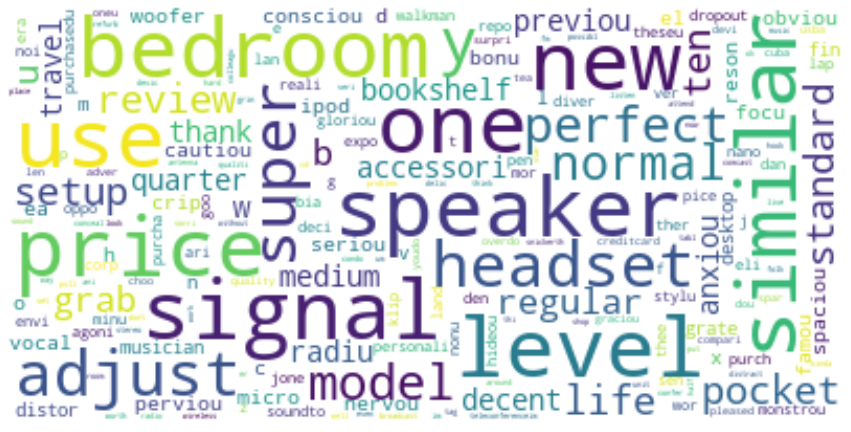

In [70]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words5))


In [71]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
product_reviews_sp2['token'] = product_reviews_sp2['clean_text'].apply(token)
product_reviews_sp2.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,...,salesRank,related,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year,clean_text,token
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me Im shop around for wireless spea...,good,0,0,2007,Is it just me Im shop around for wireless spea...,"[Is, it, just, me, Im, shop, around, for, wire..."
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,work OK 25 star work ok not worth the price ta...,bad,6,2,2005,work OK 25 star work ok not worth the price ta...,"[work, OK, 25, star, work, ok, not, worth, the..."
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,one broke other complet fuzz I purchas these s...,bad,4,0,2006,one broke other complet fuzz I purchas these s...,"[one, broke, other, complet, fuzz, I, purchas,..."
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,3,1043884800,2003-01-30,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,pretti good speaker I got these for christma o...,good,20,1,2003,pretti good speaker I got these for christma o...,"[pretti, good, speaker, I, got, these, for, ch..."
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""",4,1140480000,2006-02-21,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,{'Electronics': 29598},"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,good enough that I want to buy a third pair I ...,good,7,0,2006,good enough that I want to buy a third pair I ...,"[good, enough, that, I, want, to, buy, a, thir..."


In [72]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
product_reviews_sp2['review_length'] = product_reviews_sp2['review_text'].apply(length)
product_reviews_sp2.head(3)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,...,related,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year,clean_text,token,review_length
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,Is it just me Im shop around for wireless spea...,good,0,0,2007,Is it just me Im shop around for wireless spea...,"[Is, it, just, me, Im, shop, around, for, wire...",89
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,work OK 25 star work ok not worth the price ta...,bad,6,2,2005,work OK 25 star work ok not worth the price ta...,"[work, OK, 25, star, work, ok, not, worth, the...",79
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,"{'also_viewed': ['B0036VO2B8', 'B002CCSSOY', '...",RCA,one broke other complet fuzz I purchas these s...,bad,4,0,2006,one broke other complet fuzz I purchas these s...,"[one, broke, other, complet, fuzz, I, purchas,...",138


In [73]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_sp2["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 3344831


In [74]:
product_reviews_sp2['review_length'].describe()

count    26340.00000
mean       126.98675
std        147.24193
min          2.00000
25%         41.00000
50%         77.00000
75%        154.00000
max       2748.00000
Name: review_length, dtype: float64

In [75]:
product_reviews_sp2['rating_class_num'] = product_reviews_sp2['rating_class'].map({'good': 1, 'bad': 0})

In [76]:
product_reviews_sp2.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,...,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year,clean_text,token,review_length,rating_class_num
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,Is it just me Im shop around for wireless spea...,good,0,0,2007,Is it just me Im shop around for wireless spea...,"[Is, it, just, me, Im, shop, around, for, wire...",89,1
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,work OK 25 star work ok not worth the price ta...,bad,6,2,2005,work OK 25 star work ok not worth the price ta...,"[work, OK, 25, star, work, ok, not, worth, the...",79,0
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,one broke other complet fuzz I purchas these s...,bad,4,0,2006,one broke other complet fuzz I purchas these s...,"[one, broke, other, complet, fuzz, I, purchas,...",138,0
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,3,1043884800,2003-01-30,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,pretti good speaker I got these for christma o...,good,20,1,2003,pretti good speaker I got these for christma o...,"[pretti, good, speaker, I, got, these, for, ch...",163,1
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""",4,1140480000,2006-02-21,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,good enough that I want to buy a third pair I ...,good,7,0,2006,good enough that I want to buy a third pair I ...,"[good, enough, that, I, want, to, buy, a, thir...",453,1


In [77]:
product_reviews_sp2.to_csv('product_reviews_sp2.csv', sep=',', encoding='utf-8', index = False)

In [78]:
df3 = product_reviews_sp2

In [79]:
df3.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,reviewTime,url,description,categories,product_title,...,brand_name,review_text,rating_class,HelpfulnessNumerator,HelpfulnessDenominator,year,clean_text,token,review_length,rating_class_num
1420,A32Z1V9II49XZY,B00000J0D8,A. Steckel,3,1173744000,2007-03-13,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,Is it just me Im shop around for wireless spea...,good,0,0,2007,Is it just me Im shop around for wireless spea...,"[Is, it, just, me, Im, shop, around, for, wire...",89,1
1421,A7OR8OWWGK55W,B00000J0D8,BJB,2,1128902400,2005-10-10,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,work OK 25 star work ok not worth the price ta...,bad,6,2,2005,work OK 25 star work ok not worth the price ta...,"[work, OK, 25, star, work, ok, not, worth, the...",79,0
1422,AZHOP0V69KO20,B00000J0D8,Brundlefly,2,1164153600,2006-11-22,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,one broke other complet fuzz I purchas these s...,bad,4,0,2006,one broke other complet fuzz I purchas these s...,"[one, broke, other, complet, fuzz, I, purchas,...",138,0
1423,A21Q1LBZP2671X,B00000J0D8,Cody L. Patterson,3,1043884800,2003-01-30,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,pretti good speaker I got these for christma o...,good,20,1,2003,pretti good speaker I got these for christma o...,"[pretti, good, speaker, I, got, these, for, ch...",163,1
1424,ANU1675O6DO5E,B00000J0D8,"George Costanza ""George Costanza""",4,1140480000,2006-02-21,http://ecx.images-amazon.com/images/I/7163PXAQ...,Chances are there's one or two places at home ...,"[[Electronics, Computers & Accessories, Laptop...",RCA WSP150 900 MHz Wireless Speakers (Disconti...,...,RCA,good enough that I want to buy a third pair I ...,good,7,0,2006,good enough that I want to buy a third pair I ...,"[good, enough, that, I, want, to, buy, a, thir...",453,1


In [80]:
# Drop unnecessary columns
df4 = df3.drop(['rating','reviewer_name','salesRank','unix_review_time','reviewTime','url','description','categories','product_title','price','related','brand_name','rating_class_num','HelpfulnessNumerator','HelpfulnessDenominator','review_length'], axis=1)

In [81]:
df4.head()

,reviewer_id,product_id,review_text,rating_class,year,clean_text,token
1420,A32Z1V9II49XZY,B00000J0D8,Is it just me Im shop around for wireless spea...,good,2007,Is it just me Im shop around for wireless spea...,"[Is, it, just, me, Im, shop, around, for, wire..."
1421,A7OR8OWWGK55W,B00000J0D8,work OK 25 star work ok not worth the price ta...,bad,2005,work OK 25 star work ok not worth the price ta...,"[work, OK, 25, star, work, ok, not, worth, the..."
1422,AZHOP0V69KO20,B00000J0D8,one broke other complet fuzz I purchas these s...,bad,2006,one broke other complet fuzz I purchas these s...,"[one, broke, other, complet, fuzz, I, purchas,..."
1423,A21Q1LBZP2671X,B00000J0D8,pretti good speaker I got these for christma o...,good,2003,pretti good speaker I got these for christma o...,"[pretti, good, speaker, I, got, these, for, ch..."
1424,ANU1675O6DO5E,B00000J0D8,good enough that I want to buy a third pair I ...,good,2006,good enough that I want to buy a third pair I ...,"[good, enough, that, I, want, to, buy, a, thir..."


In [82]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26340 entries, 1420 to 1689182
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewer_id   26340 non-null  object
 1   product_id    26340 non-null  object
 2   review_text   26340 non-null  object
 3   rating_class  26340 non-null  object
 4   year          26340 non-null  int64 
 5   clean_text    26340 non-null  object
 6   token         26340 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.9+ MB


In [83]:
## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#from gensim.models import Word2Vec
from tqdm import tqdm
#import xgboost as xgb
#from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

### Separating Response Variable and Feature

In [84]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [85]:
# Splitting the Data Set into Train and Test Sets
X = df4['clean_text']
y = df4['rating_class']

### Splitting Dataset into Train and Test Set

In [86]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(21072,)
Test Set Shape		:(5268,)


## Selecting the Right Evaluation Metric

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [89]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

## 1.0 CountVectorizer Bag of Words


In [90]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [91]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 52801


In [92]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [93]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,00,000,0000,0000001,00003,0000ff,0000speak,0000the,001,0016,...,zt,zte,zulu,zune,zuzu,zvox,zvoz,zx,zx100,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating a function for applying different algorithms

In [94]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [95]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.8468374057236059


In [96]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.06      0.06       428
           1       0.92      0.92      0.92      4840

    accuracy                           0.85      5268
   macro avg       0.49      0.49      0.49      5268
weighted avg       0.85      0.85      0.85      5268



### 4.1.1 Logistic Regression with CountVectorizer

In [97]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                            C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9368778879137922


In [98]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       428
           1       0.96      0.98      0.97      4840

    accuracy                           0.94      5268
   macro avg       0.83      0.74      0.77      5268
weighted avg       0.94      0.94      0.94      5268



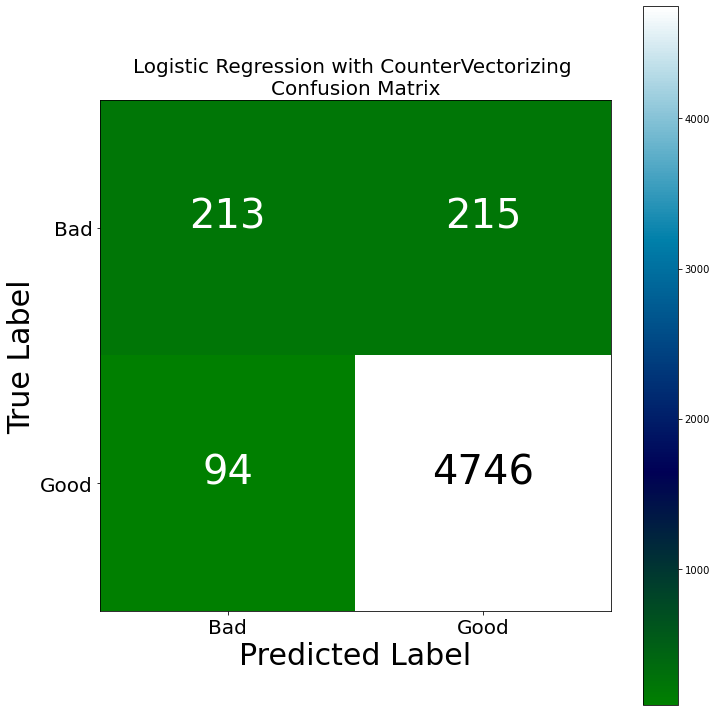

In [99]:
import itertools

# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 4.1.2 Random Forest with CountVectorizer¶

In [100]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 100, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8821639649917258


In [101]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       428
           1       0.92      1.00      0.96      4840

    accuracy                           0.92      5268
   macro avg       0.96      0.51      0.49      5268
weighted avg       0.93      0.92      0.88      5268



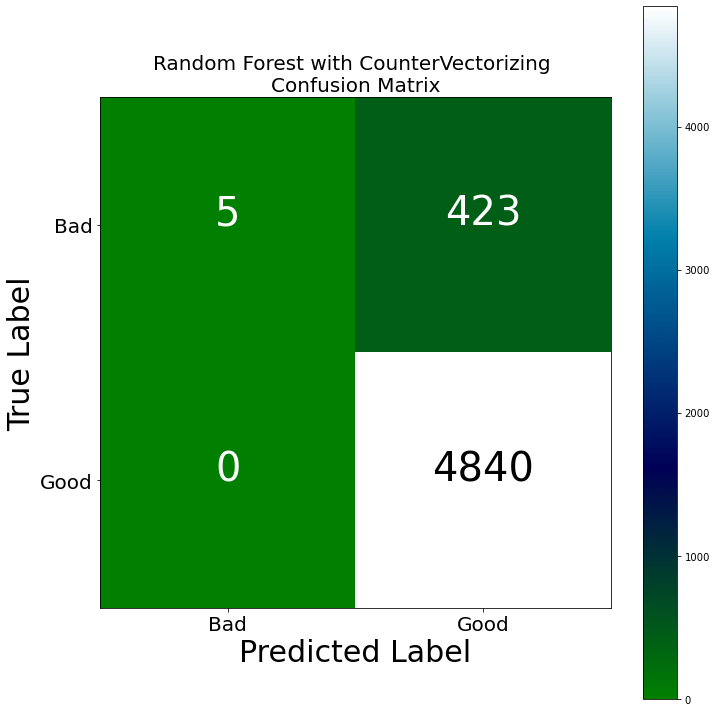

In [102]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4.1.3 Naive Bayes with CountVectorizer

In [103]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.9024898627972953


In [104]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.88      0.13      0.23       428
           1       0.93      1.00      0.96      4840

    accuracy                           0.93      5268
   macro avg       0.90      0.56      0.59      5268
weighted avg       0.92      0.93      0.90      5268



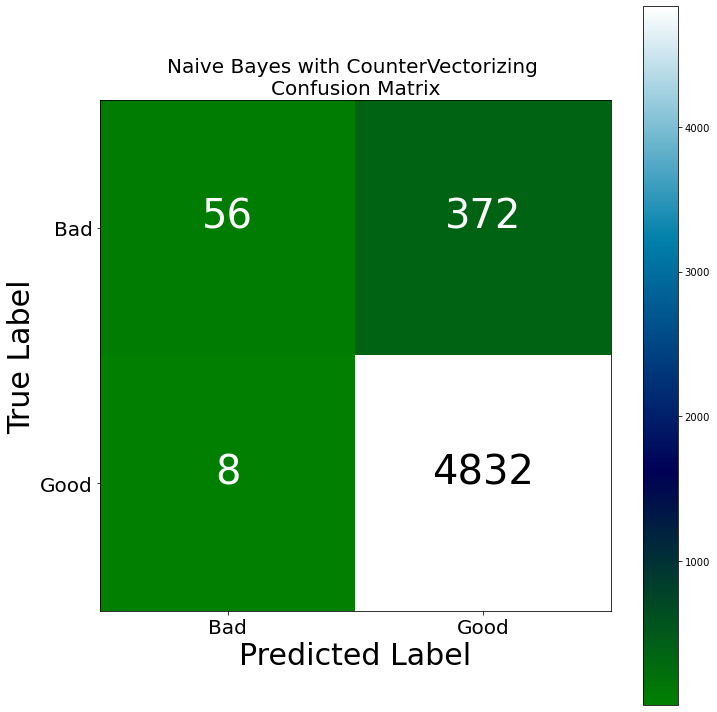

In [105]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

In [106]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T
# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [107]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [108]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [109]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes'])

In [110]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.941344 bad       0.693811  0.497664  0.579592   
                                  good      0.956662  0.980579  0.968473   
                                  average   0.935307  0.941344  0.936878   
           Random Forest 0.919704 bad       1.000000  0.011682  0.023095   
                                  good      0.919628  1.000000  0.958131   
                                  average   0.926157  0.919704  0.882164   
           Naive Bayes   0.927866 bad       0.875000  0.130841  0.227642   
                                  good      0.928517  0.998347  0.962166   
                                  average   0.924169  0.927866  0.902490   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.941344 bad        428.0  
                                  good      4840.0  
                                  average   5268.0  
           Random Forest 0.919704 bad        428.0  
                                  good      4840.0  
                                  average   5268.0  
           Naive Bayes   0.927866 bad        428.0  
                                  good      4840.0  
                                  average   5268.0

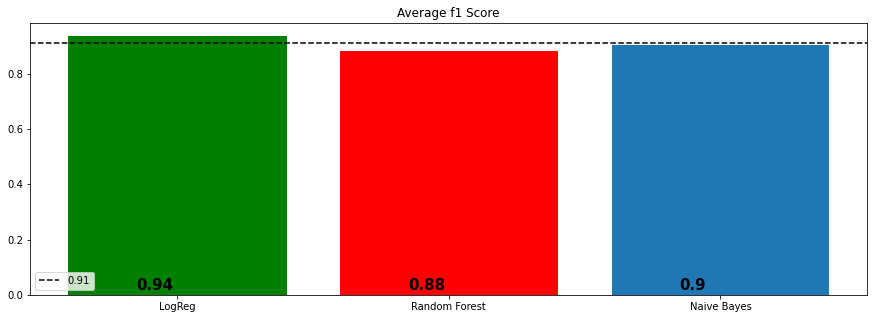

In [111]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## TF-IDF

In [112]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

## Logistic Regression

In [113]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8798521901204276


In [114]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       428
           1       0.92      1.00      0.96      4840

    accuracy                           0.92      5268
   macro avg       0.46      0.50      0.48      5268
weighted avg       0.84      0.92      0.88      5268



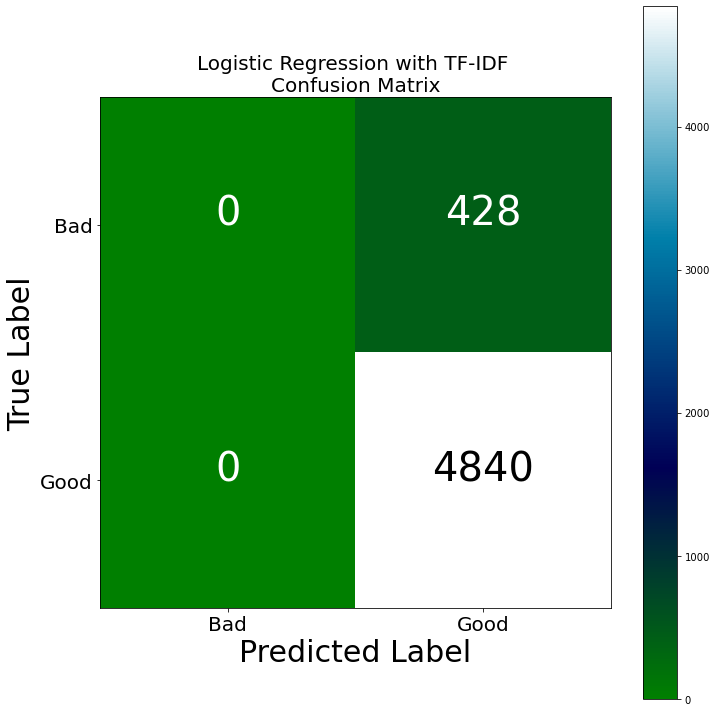

In [115]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

## Random Forest

In [116]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 100, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.9022406588318006


In [117]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.89      0.13      0.22       428
           1       0.93      1.00      0.96      4840

    accuracy                           0.93      5268
   macro avg       0.91      0.56      0.59      5268
weighted avg       0.93      0.93      0.90      5268



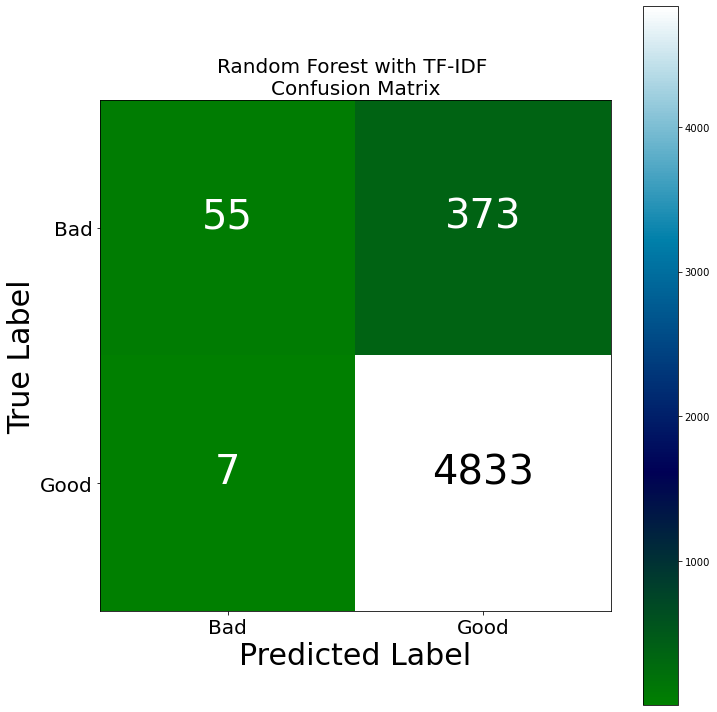

In [118]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### Naive Bayes with TF-IDF

In [119]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.8803180096189991


In [120]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       428
           1       0.92      1.00      0.96      4840

    accuracy                           0.92      5268
   macro avg       0.96      0.50      0.48      5268
weighted avg       0.93      0.92      0.88      5268



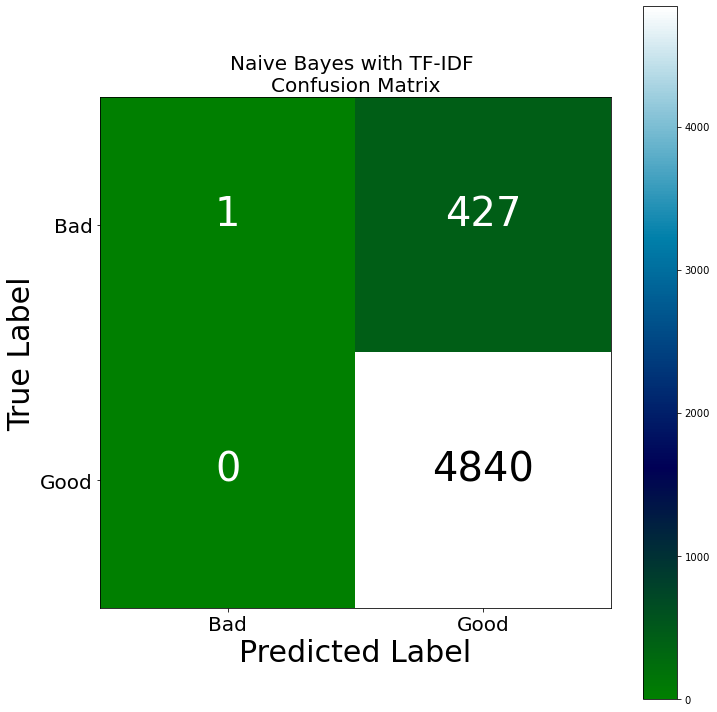

In [121]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

In [122]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes'])

In [123]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.918755 bad       0.000000  0.000000  0.000000   
                                  good      0.918755  1.000000  0.957657   
                                  average   0.844110  0.918755  0.879852   
           Random Forest 0.927866 bad       0.887097  0.128505  0.224490   
                                  good      0.928352  0.998554  0.962174   
                                  average   0.925000  0.927866  0.902241   
           Naive Bayes   0.918945 bad       1.000000  0.002336  0.004662   
                                  good      0.918929  1.000000  0.957752   
                                  average   0.925516  0.918945  0.880318   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.918755 bad        428.0  
                                  good      4840.0  
                                  average   5268.0  
           Random Forest 0.927866 bad        428.0  
                                  good      4840.0  
                                  average   5268.0  
           Naive Bayes   0.918945 bad        428.0  
                                  good      4840.0  
                                  average   5268.0

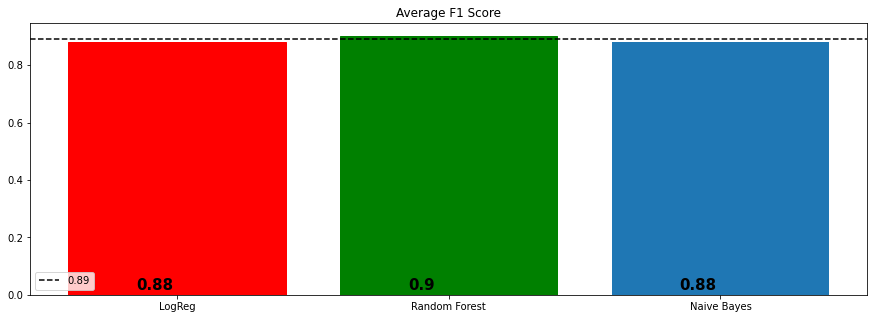

In [124]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

## Sentiment Analysis using Vader_lexicon

In [125]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ghpra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [126]:
nltk.download('vader_lexicon')
from nltk.tokenize import sent_tokenize
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
sa = SentimentIntensityAnalyzer()
from statistics import mean 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ghpra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [127]:
# selecting Text and score from the dataset
df = product_reviews_sp2[['clean_text','rating']]
df.head()

,clean_text,rating
1420,Is it just me Im shop around for wireless spea...,3
1421,work OK 25 star work ok not worth the price ta...,2
1422,one broke other complet fuzz I purchas these s...,2
1423,pretti good speaker I got these for christma o...,3
1424,good enough that I want to buy a third pair I ...,4


In [128]:
#Recoding the score into binary
df['rating']=df['rating'].apply(lambda x: "positive" if x > 3 else "negative")

In [129]:
# checking the first five rows of the datset
df.head()

,clean_text,rating
1420,Is it just me Im shop around for wireless spea...,negative
1421,work OK 25 star work ok not worth the price ta...,negative
1422,one broke other complet fuzz I purchas these s...,negative
1423,pretti good speaker I got these for christma o...,negative
1424,good enough that I want to buy a third pair I ...,positive


In [130]:
#count if the scores
df['rating'].value_counts()

positive    22076
negative     4264
Name: rating, dtype: int64

In [131]:
# sentiment Intensity Analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [132]:
#applying Sid polarity scores
df['label_scores'] = df['clean_text'].apply(lambda Text: sid.polarity_scores(Text))

df.head()

,clean_text,rating,label_scores
1420,Is it just me Im shop around for wireless spea...,negative,"{'neg': 0.086, 'neu': 0.812, 'pos': 0.102, 'co..."
1421,work OK 25 star work ok not worth the price ta...,negative,"{'neg': 0.022, 'neu': 0.911, 'pos': 0.067, 'co..."
1422,one broke other complet fuzz I purchas these s...,negative,"{'neg': 0.058, 'neu': 0.832, 'pos': 0.11, 'com..."
1423,pretti good speaker I got these for christma o...,negative,"{'neg': 0.045, 'neu': 0.835, 'pos': 0.12, 'com..."
1424,good enough that I want to buy a third pair I ...,positive,"{'neg': 0.036, 'neu': 0.818, 'pos': 0.145, 'co..."


In [133]:
#compound score
df['compound']  = df['label_scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,clean_text,rating,label_scores,compound
1420,Is it just me Im shop around for wireless spea...,negative,"{'neg': 0.086, 'neu': 0.812, 'pos': 0.102, 'co...",0.3612
1421,work OK 25 star work ok not worth the price ta...,negative,"{'neg': 0.022, 'neu': 0.911, 'pos': 0.067, 'co...",0.5372
1422,one broke other complet fuzz I purchas these s...,negative,"{'neg': 0.058, 'neu': 0.832, 'pos': 0.11, 'com...",0.6701
1423,pretti good speaker I got these for christma o...,negative,"{'neg': 0.045, 'neu': 0.835, 'pos': 0.12, 'com...",0.8834
1424,good enough that I want to buy a third pair I ...,positive,"{'neg': 0.036, 'neu': 0.818, 'pos': 0.145, 'co...",0.9945


In [134]:
# recoding of compound score
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

df.head()

,clean_text,rating,label_scores,compound,comp_score
1420,Is it just me Im shop around for wireless spea...,negative,"{'neg': 0.086, 'neu': 0.812, 'pos': 0.102, 'co...",0.3612,positive
1421,work OK 25 star work ok not worth the price ta...,negative,"{'neg': 0.022, 'neu': 0.911, 'pos': 0.067, 'co...",0.5372,positive
1422,one broke other complet fuzz I purchas these s...,negative,"{'neg': 0.058, 'neu': 0.832, 'pos': 0.11, 'com...",0.6701,positive
1423,pretti good speaker I got these for christma o...,negative,"{'neg': 0.045, 'neu': 0.835, 'pos': 0.12, 'com...",0.8834,positive
1424,good enough that I want to buy a third pair I ...,positive,"{'neg': 0.036, 'neu': 0.818, 'pos': 0.145, 'co...",0.9945,positive


In [135]:
#count the value of compound score
df['comp_score'].value_counts()

positive    23723
negative     2617
Name: comp_score, dtype: int64

In [136]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [137]:
#accuracy score
accuracy_score(df['rating'],df['comp_score'])

0.8458238420652999

In [138]:
#classification report
print(classification_report(df['rating'],df['comp_score']))

              precision    recall  f1-score   support

    negative       0.54      0.33      0.41      4264
    positive       0.88      0.95      0.91     22076

    accuracy                           0.85     26340
   macro avg       0.71      0.64      0.66     26340
weighted avg       0.82      0.85      0.83     26340



In [139]:
#confusion matrix
print(confusion_matrix(df['rating'],df['comp_score']))

[[ 1410  2854]
 [ 1207 20869]]
